In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Admission_Predict.csv")

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.shape

(400, 9)

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.65)

In [14]:
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [51]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,1.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [15]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [16]:
y=y.astype(int)

<AxesSubplot: xlabel='Chance of Admit ', ylabel='count'>

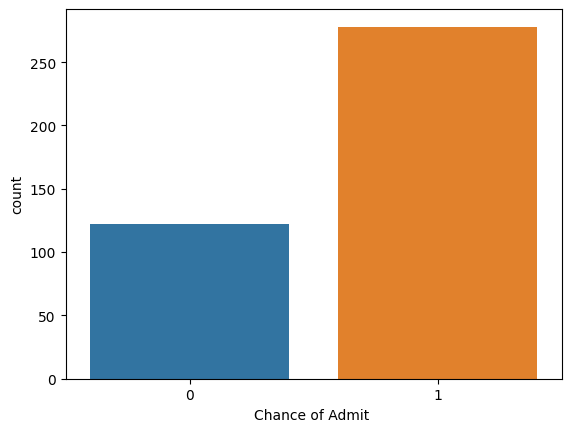

In [17]:
sns.countplot(x=y)

In [18]:
y.value_counts()

1    278
0    122
Name: Chance of Admit , dtype: int64

In [26]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [27]:
x_train.shape


(300, 8)

In [28]:
x_test.shape

(100, 8)

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [30]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred=clf.predict(x_test)

In [32]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [33]:
y_test

132    1
309    1
341    1
196    1
246    1
      ..
146    1
135    1
390    0
264    1
364    1
Name: Chance of Admit , Length: 100, dtype: int32

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

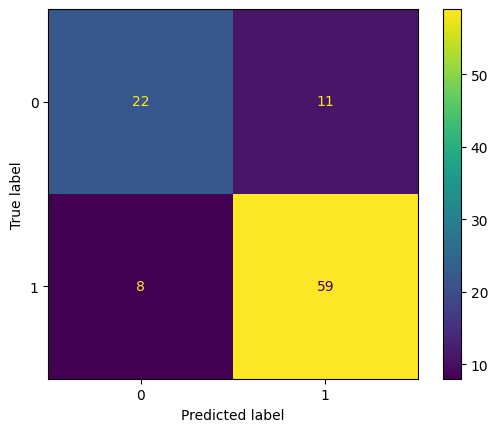

In [41]:
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [42]:
accuracy_score(y_test,y_pred)

0.81

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        33
           1       0.84      0.88      0.86        67

    accuracy                           0.81       100
   macro avg       0.79      0.77      0.78       100
weighted avg       0.81      0.81      0.81       100



In [59]:
new=[[322,110,3,3.5,2.5,8.67,1,0]]
clf.predict(new)[0]

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

[Text(0.4353125, 0.95, 'CGPA <= 8.265\ngini = 0.417\nsamples = 300\nvalue = [89, 211]\nclass = AD'),
 Text(0.235, 0.85, 'TOEFL Score <= 103.5\ngini = 0.358\nsamples = 90\nvalue = [69, 21]\nclass = NA'),
 Text(0.11, 0.75, 'CGPA <= 8.015\ngini = 0.188\nsamples = 57\nvalue = [51, 6]\nclass = NA'),
 Text(0.04, 0.65, 'SOP <= 2.25\ngini = 0.093\nsamples = 41\nvalue = [39, 2]\nclass = NA'),
 Text(0.02, 0.55, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]\nclass = NA'),
 Text(0.06, 0.55, 'TOEFL Score <= 99.5\ngini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = NA'),
 Text(0.04, 0.45, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = NA'),
 Text(0.08, 0.45, 'CGPA <= 7.92\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = NA'),
 Text(0.06, 0.35, 'CGPA <= 7.77\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = AD'),
 Text(0.04, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = NA'),
 Text(0.08, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = AD'),
 Text(0.1, 0.35, 'gini = 0.0\nsamples 

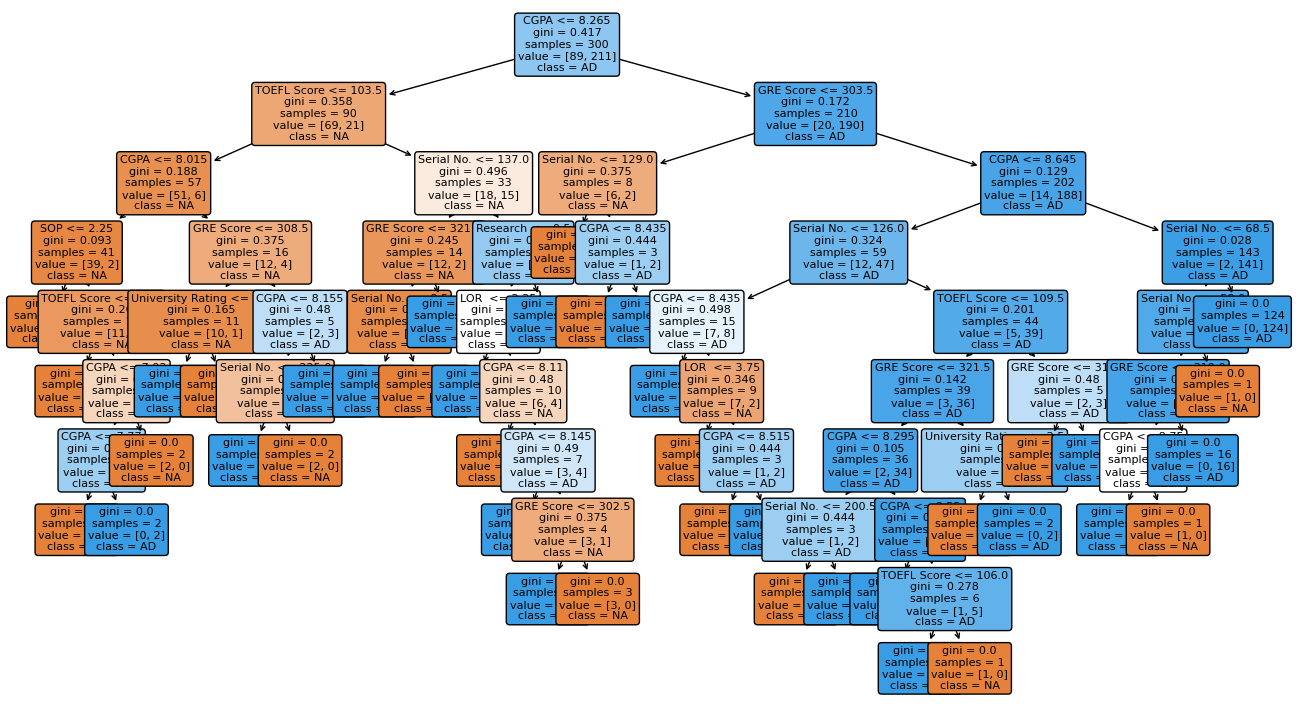

In [53]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plot_tree(clf,fontsize=8,filled=True,rounded=True,feature_names=x.columns,class_names=['NA','AD'])